In [4]:
%matplotlib inline
from IPython.display import Latex
"""
SymPy是一个符号数学Python库。它的目标是成为一个全功能的计
算机代数系统，同时保持代码的精简而易于理解和可扩展。
SymPy完全由Python写成，不需要任何外部库。
可用SymPy进行数学表达式的符号推导和演算。可使用isympy运行
程序，isympy在 IPython的基础上添加了数学表达式的直观显示功能。
"""
from __future__ import division 
from sympy import *
x, y, z, t = symbols('x,y,z,t')
k, m, n = symbols('k,m,n', integer=True)
f, g, h = symbols('f,g,h', cls=Function) # 类型为function
init_printing()
"""
这段程序首先将Python的除法操作符“/”从整数除法改为普通除法。
然后从SymPy库载 入所有符号，并且定义了四个通用的数学符号x、y
、z 、t，三个表示整数的符号k、m、n，以及三个表示数学函数的符号
f、g、h。
"""
print()

In [1]:
"# 欧拉恒等式"
from IPython.display import Latex
Latex(r"\[ e^{i\pi} + 1 = 0 \]")

<IPython.core.display.Latex object>

In [7]:
"""
 此公式被称为欧拉恒等式，其中e是自然常数，i是虚数单位，   是
圆周率。此公式被誉为数学中最奇妙的公式，它将5个基本数学常数用
加法、乘法和幂运算联系起来。
  从SymPy库载入的符号中，E表示自然常数，I表示虚数单位，pi表
示圆周率，因此上面 的公式可以直接如下计算
"""
E**(I*pi) + 1

In [5]:
"""
SymPy除了可以直接计算公式的值之外，还可以帮助做数学公式的推
导和证明。欧拉恒等式可以将    代入下面的欧拉公式得到
"""
Latex(r"\[ e^{ix} = cosx + isinx \]")

<IPython.core.display.Latex object>

In [6]:
"在SymPy中可以使用expand()将表达式展开"
expand(E ** (I*x))
#  没有成功，只是换了一种写法而已。当 expand() 的 complex 参数为
# True时，表达式将被分为实数和虚数两个部分

In [7]:
expand(exp(I*x), complex=True) 

In [11]:
"""
 这次将表达式展开了，但是得到的结果相当复杂。显然，expand()将x当
做复数了。为了指定x为实数，需要重新定义x
"""
x = Symbol("x", real=True)
expand(exp(I*x), complex=True) 

In [13]:
# 终于得到了需要的公式。可以用泰勒多项式对其进行展开
tmp = series(exp(I*x), x, 0, 10)
print(tmp)

1 + I*x - x**2/2 - I*x**3/6 + x**4/24 + I*x**5/120 - x**6/720 - I*x**7/5040 + x**8/40320 + I*x**9/362880 + O(x**10)


In [14]:
""" series()对表达式进行泰勒级数展开。可以看到展开之后虚数项和
实数项交替出现。根据欧拉公式，虚数项的和应该等于sin(x)的泰勒
展开，而实数项的和应该等于cos(x)的泰勒展开。
"""
# 下面获得tmp的实部
re(tmp)

In [12]:
"下面对cos(x)进行泰勒展开，可看到其中各项和上面的结果是一致的"
series(cos(x), x, 0, 10)

In [13]:
" 下面获得tmp的虚部"
im(tmp)

In [14]:
" 下面对sin(x)进行泰勒展开，其中各项也和上面的结果一致"
series(sin(x), x, 0, 10)

In [8]:
"""由于e**ix展开式的实部和虚部分别等于cos(x)和sin(x),
因此验证了欧拉公式的正确性"""
print("欧拉恒等式证毕")

欧拉恒等式证毕


In [21]:
"符号积分"
""" Scipy介绍了如何使用数值定积分计算球体的体积，SymPy中的
integrate()则可以进行符号积分。用integrate()进行不定积分运算
"""
integrate(x*sin(x), x)

In [22]:
" 如果指定变量x的取值范围, integrate()就能进行定积分运算"
integrate(x*sin(x), (x, 0, 2*pi))

In [23]:
""" 为了计算球体体积，首先看看如何计算圆的面积，假设圆的半径
为r，则圆上任意一点的Y坐标函数为
"""
Latex(r"\[ y(x) = \sqrt{r^2 - x^2} \]")

<IPython.core.display.Latex object>

In [26]:
"圆的面积"
"因此可以直接对函数y(x)在-r到r区间上进行定积分得到半圆面积"

x, y, r = symbols('x,y,r')
f = 2 * integrate(sqrt(r*r-x**2), (x, -r, r))
print(f)

2*Integral(sqrt(r**2 - x**2), (x, -r, r))


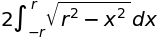

In [27]:
f

In [28]:
""" 首先需要定义运算中所需的符号，这里用symbols()一次创建多个符号
。Integrate()没有计算出积分结果，而是直接返冋了输入的算式。
这是因为SymPy不知道r是大于0的，重新定义r，就可以得到正确答案了
"""
r = symbols( 'r', positive=True)
circle_area = 2 * integrate(sqrt(r**2-x**2), (x, -r, r))
circle_area

In [29]:
"球的体积"

"""接下来对此面积公式进行定积分，就可以得到球体的体积，但是随着
X轴坐标的变化，对应切面的半径也会发生变化
"""
" 用subs进行算式替换"
""" subs()可以将算式中的符号进行替换，它有3种调用方式：
expression.subs(x, y):将算式中的 x 替换成 y.
expression.subs({x:y,u:v}):使用字典进行多次替换.
expression.subs([(x,y),(u,v)])：使用列表进行多次替換.
"""
"""
请注意多次替换是顺序执行的，因此
 expression.subs([(x,y),(y,x)])
并不能对符号x和y进行交换
"""
"""假设X轴的坐标为x,球体的半径为r,那么x处球的切面半径可以使用
前面的公式y(x)计算出。因此需要对圆的面积公式circle_area中的变量r
进行替代"""
circle_area = circle_area.subs(r, sqrt(r**2-x**2))
circle_area

In [31]:
"""然后对circle_area中的变量x在区间-r到r上进行定积分，就可以得到
球体的体积公式"""
integrate(circle_area, (x, -r, r)) # 对面积微元进行积分

In [35]:
"符号"
""" 创建一个符号使用symbols()，此函数会返回一个Symbol对象，用于
表示符号变量，其有name属性，这是符号名，如"""
x0 = symbols("x0")
# 或
x0 = Symbol("x0")

In [36]:
"""其中左边的x是一个符号对象，而右边括号中用引号包着的x是符号
对象的name属性，两个x不要求一样，但是为了易于理解，通常将符号
对象和name属性显示成一样，另外name属性是引号包起来的。如要同
时配置多个符号对象，symbols()中多个name属性可以以空格或者逗号
分隔，然后用引号包住，如下"""
x0,y0,x1,y1 = symbols('x0,y0,x1,y1')

In [38]:
""" 一次配置三个符号，由于符号对象名和name属性名经常一致，所
以可以使用var（）函数，如"""
var("x0,y0,x1,y1")

In [39]:
""" 这语句和上个语句功能一致，在当前环境中创建了4个同名的
Symbol对象（为了防止误会，使用symbols其实更好）"""
"""上面的语句创建了名为x0、y0、x1、y1的4个Symbol对象，同时还在当
前的环境中创建 了 4个同名的变量来分别表示这4个Symbol对象。因为符
号对象在转换为字符串时直接使用它的name 属性，因此在交互式环境中
看到变量,x0的值就是x0，但是査看变量x0的类型时就可以发现，它实际
上是一个Symbol对象"""
x0

In [40]:
type(x0)

sympy.core.symbol.Symbol

In [41]:
x0.name

'x0'

In [42]:
type(x0.name)

str

In [43]:
" 变量名和符号名当然也可以是不一样的，例如"
a, b = symbols("alpha, beta")
a, b

In [44]:
""" 数学公式中的符号一般都有特定的假设，例如m、n通常是整数，而z经
常表示复数。在用var()、symbols() 或 Symbol() 创建Symbol对象时，可
以通过关键字参数指定所创建符号的假设条件，这些假设条件会影响到
它们所参与的计算"""
" 例如，下面创建了两个整数符号 m 和 n, 以及一个正数符号 x"
m, n = symbols("m,n", integer=True)
x = Symbol("x", positive=True)

In [45]:
"""每个符号都有许多is_*属性，用以判断符号的各种假设条件。在IPython
中，使用自动完 成功能可以快速査看这些假设的名称。注意下划线后为
大写字母的属性，用来判断对象的类型; 而全小写字母的属性，则用来
判断符号的假设条件。"""
x.is_Symbol

True

In [46]:
x.is_positive

True

In [47]:
x.is_imaginary

False

In [48]:
# x是一个复数，因为复数包括实数，而实数包括正数 
x.is_complex

True

In [53]:
"""使用 assumptions0  属性可以快速査看所有的假设条件，其中
commutative为True表示此符号满足交换律，其余的假设条件根据英文名
很容易知道它们的含义。"""
x.assumptions0

{'commutative': True,
 'complex': True,
 'hermitian': True,
 'imaginary': False,
 'negative': False,
 'nonnegative': True,
 'nonpositive': False,
 'nonzero': True,
 'positive': True,
 'real': True,
 'zero': False}

In [54]:
"""在SymPy中，所有的对象都从Basic类继承，实际上这些is_*属性和
assumptions0属性都是在Basic类中定义的"""
Symbol.mro()

[sympy.core.symbol.Symbol,
 sympy.core.expr.AtomicExpr,
 sympy.core.basic.Atom,
 sympy.core.expr.Expr,
 sympy.logic.boolalg.Boolean,
 sympy.core.basic.Basic,
 sympy.core.evalf.EvalfMixin,
 object]

In [55]:
"数值"
"""为了实现符号运算，在SymPy内部有一整套数值运算系统。因
此SymPy的数值和Python 的整数、浮点数是完全不同的对象。为
了使用方便，SymPy会尽量自动将Python的数值类型转换为SymPy的数值类型。
此外，SymPy提供了一个S对象用于进行这种转换。
在下面的例子中，当有SymPy的数值参与计算时，结果将是SymPy的数值对象。
"""
# 结果为浮点数
1/2 + 1/3

In [56]:
#结果为SymPy的数值对象
S(1)/2 + 1/S(3)

In [57]:
"""“5/6”在SymPy中使用Rational对象表示，它由两个整数的商表示，
数学上称之为有理数。也可以直接通过Rational创建"""
# 有理数会自动进行约分处理
Rational(5,10)

In [59]:
"运算符和函数"
"""SymPy重新定义了所有的数学运算符和数学函数。例如Add类表示加
法，Mul类表示乘法，而Pow类表示指数运算，sin类表示正弦函数。和
Symbol对象一样，这些运算符和函数都从Basic类继承，可在IPython中
查看它们的继承列表(例如:Add.mro())。可以使用这些类创建复杂的表
达式"""
var("x, y, z, n")
Add(x, y, z)

In [60]:
Add(Mul(x,y,z), Pow(x,y), sin(z))

In [61]:
"""由于在Basic类中重新定义了__add__()等用于创建表达式的方法，因
此可以使用和Python表达式相同的方式创建SymPy的表达式"""
x*y*z + sin(z) + x**y 

In [62]:
"""在Basic类中定义了两个很重要的属性：func和args。func属性得到对
象的类，而args得到其参数。使用这两个属性可以观察SymPy所创建的
表达式。 SymPy没有减法运算类，下面看看减法运算所得到的表达式"""
t = z - y
f.func # 减法运算用加法类Add表示 

sympy.core.mul.Mul

In [63]:
t.args # 两个加数一个是x，一个是-y

In [64]:
t.args[1].func # -y是用Mul表示的

sympy.core.mul.Mul

In [65]:
t.args[1].args

In [68]:
"""通过上面的例子可以看出，表达式“x-y”在SymPy中实际上是用
“Add(x, Mul(-1, y))”表示的。同样，SymPy中没有除法类，可使用和
上面相同的方法观察“x/y”在SymPy中是如何表示的"""
""" SymPy的表达式实际上是一个由Basic类的各种对象进行多层嵌套所
得到的树状结构。下面的函数使用递归显示这种树状结构"""
def print_expression(e, level=0): 
    spaces = " "*level 
    if isinstance(e, (Symbol, Number)):
        print(spaces + str(e))
        return
    if len(e.args) > 0:
        print(spaces + e.func.__name__)
        for arg in e.args: 
            print_expression(arg, level+1) 
    else:
        print(spaces + e.func.__name__)

In [69]:
"""由于fsolve函数在调用函数f时，传递的参数为数组，因此如果直接使
用数组中的元素计算的话，计算速度将会有所降低，因此这里先用
float函数将数组中的元素转换为Python中的标准浮点数，然后调用标
准math库中的函数进行运算。"""
"例如(x^2 + y^2)^0.5在SymPy中使用下面的树表示"
print_expression(sqrt(x**2+y**2))

Pow
 Add
  Pow
   x
   2
  Pow
   y
   2
 1/2


In [70]:
"""由于其中的各个对象的args属性类型是元组，因此表达式一旦创建就不
能再改变。使用不可变的结构表示表达式有很多优点，例如可以用表达
式作为字典的键"""
"""除了使用SymPy中预先定义好的具有特殊运算含义的数学函数之外，
还可以使用Function()创建自定义的数学函数"""
f = Function("f")

In [71]:
"""请注意Function虽然是一个类，但是上面的语句所得到的f并不是
Function类的实例。和预定义的数学函数一样，f是一个类，它从
Function类继承"""
f.__base__

AppliedUndef

In [72]:
isinstance(f, Function)

False

In [74]:
" 当我使用f创建一个表达式时，就相当于创建它的一个实例"
t = f(x, y)
isinstance(t, Function)

True

In [75]:
type(t)

f

In [76]:
t.func  # 对象的类

f

In [77]:
t.args  # 对象的参数

In [78]:
" f 的实例t可以参与表达式运算"
t + t**t

In [79]:
"表达式变换和化简"
" simplify()可以对数学表达式进行化简，例如"
simplify((x+2)**2 - (x+1)**2) 

In [80]:
"""simplify()调用SymPy内部的多种表达式变换函数对表达式进行化简运
算。但是数学表达式的化简是一件非常复杂的工作，并且对于同一个表
达式，根据其使用目的可以有多种化简方案"""
""" radsimp()对表达式的分母进行有理化，它所得到的表达式的分母部分
将不含无理数。例如"""
radsimp(1/(sqrt(5)+2*sqrt(2)))

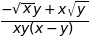

In [81]:
"它也可以对带符号的表达式进行处理"
radsimp(1/(y*sqrt(x)+x*sqrt(y)))

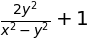

In [82]:
""" ratsimp()对表达式中的分母进行通分运算，即将表达式转换为分子除
分母的形式"""
ratsimp(x/(x+y)+y/(x-y))

In [83]:
""" fraction()返回一个包含表达式的分子和分母的元组,用它可以获得
ratsimp()通分之后的分子或分母"""
fraction(ratsimp(1/x+1/y))

In [84]:
"注意fraction()不会自动对表达式进行通分运算，因此"
fraction(1/x+1/y)

In [85]:
""" cancel()对分式表达式的分子分母进行约分运算，可以对纯符号的分
式表达式以及自定义函数表达式进行约分，但是不能对内部函数的表达
式进行约分。"""
cancel((x**2-1)/(1+x))

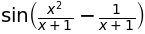

In [86]:
cancel(sin((x**2-1)/(1+x))) # cancel不能对函数内部的表达式进行约分

In [87]:
cancel((f(x)**2-1)/(f(x)+1)) #  #能对自定义函数表达式进行约分

In [88]:
""" trigsimp()对表达式中的三角函数进行化简。它有两个可选参数--deep
和recursive，默认值都为False。当deep参数为True时，将对表达式中的
所有子表达式进行简化运算；当recursive 参数为True时，将递归使用
trigsimp()进行最大限度的化简"""
trigsimp(sin(x)**2+2*sin(x)*cos(x)+cos(x)**2)

In [89]:
#也能对自定义函数中的三角函数化简
trigsimp(f(sin(x)**2+2*sin(x)*cos(x)+cos(x)**2)) 

In [91]:
"""expand_trig()可以对三角函数的表达式进行展开。它实际上是对
expand()的封装，通过将 expand()的trig参数设置为True,实现三角函数的展
开计算。输入“expand_trig??” 来査看它调用expand()时的参数"""
expand_trig(sin(2*x+y))

In [93]:
""" expand()通用的展开运算，根据用户设置的标志参数对表达式进行展幵。
默认情况下，以下的标志参数为 True"""
" mul展开乘法"
" log:展开对数函数参数中的乘积和幂运算"
x,y=symbols("x,y",positive=True)
expand(log(x*y**2))

In [94]:
"multinomial:展开加法式的整数次幂"
expand((x+y)**3)

In [95]:
"power_base:展开幂函数的底数乘积"
expand(x**(y+z)) 

In [96]:
"""可以将默认为True的标志参数设置为False,强制不展开对应的表达式。
在下面的例子中， 将mul设置为False,因此不对乘法进行展开"""
x,y,z=symbols("x,y,z", positive=True)
expand(x*log(y*z), mul=False)

In [97]:
" expand()的以下标志参数默认为False"
" complex:展开复数的实部和虚部，默认不展开复数的实部和虚部"
x,y=symbols("x,y",complex=True)
expand(x*y, complex=True)

In [98]:
" func:对一些特殊函数进行展开"
expand(gamma (1+x),func=True)

In [99]:
" trig:展开三角函数"
expand(sin(x+y), trig=True)

In [100]:
"""expand_log()、expand mul()、expand_complex()、expand_trig()、
expand_func()等函数则通过将相应的标志参数设置为True,对expand()进
行封装"""

'expand_log()、expand mul()、expand_complex()、expand_trig()、\nexpand_func()等函数则通过将相应的标志参数设置为True,对expand()进\n行封装'

In [101]:
"factor()可以对多项式表达式进行因式分解"
factor(15*x**2+2*y-3*x-10*x*y)

In [102]:
factor(expand((x+y)**20))

In [103]:
""" collect()收集表达式中指定符号的有理指数次幂的系数。例如，希望
获得如下表达式中x的各次幂的系数"""
a,b = symbols('a,b')
eq = (1+a*x)**3 + (1+b*x)**2

In [105]:
"首先需要对表达式eq进行展开，得到的表达式eq2是一系列乘式的和"
eq2 = expand(eq)
eq2

In [106]:
"然后调用collect(),对表达式eq2中X的幂的系数进行收集"
collect(eq2,x)

In [107]:
"""默认情况下，collect()返回的是一个整理之后的表达式，如果我们希
望得到x的各次幂的系数，可以设置evaluate参数为False,让它返回一个
以X的幂为键、值为系数的字典"""
p = collect(eq2, x, evaluate=False)
p[S(1)] #常数项，注意需要用SymPy中的数值1,或者使用p[x**0]

In [108]:
p[x**2] # x的2次项系数 

In [109]:
""" collect()也可以收集表达式的各次幂的系数，例如下面的程序收
集表达式“sin(2*x)”的系数"""
collect(a*sin(2*x) + b*sin(2*x), sin(2*x))

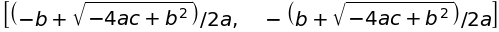

In [110]:
"方程"
"""在SymPy中，表达式可以直接表示值为0的方程。也可以使用Eq()创
建方程。solve()可以对方程进行符号求解，它的第一个参数是表示方
程的表达式，其后的参数是表示方程中未知变量的符号。下面的例子
使用solve()对一元二次方程进行求解"""
a,b,c = symbols("a,b,c") 
solve(a*x**2+b*x+c, x)

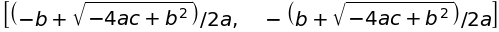

In [111]:
" 使用 Eq 创建一个方程对象并求解"
my_eq = Eq(a*x**2+b*x+c,0)
solve(my_eq, x)

In [112]:
"""由于方程的解可能有多组，因此solve()返回一个列表保存所有的解。
可以传递包含多个表达式的元组或列表，让solve()对方程组进行求解，
得到的解是两层嵌套的列表，其中每个元组表示方程组的一组解"""
#对方程组求解（用元组将几个方程组成一个组）
solve((x**2+x*y+1, y**2+x*y+2), x, y )
#有两组解

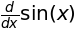

In [113]:
"微分"
"""Derivative是表示导函数的类，它的第一个参数是需要进行求导的数学函数，
第二个参数是求导的自变量.注意Derivative所得到的是一个导函数，
它并不会进行求导运算"""
t = Derivative(sin(x),x)  #创建了一个导函数对象
t

In [114]:
"如果希望它进行实际的运算，计算出导函数，可以调用其doit()方法"
t.doit()

In [115]:
"也可以直接使用diff()函数或表达式的diff()方法来计算导函数"
diff(sin(x*x), x)

In [116]:
sin(2*x).diff(x)

In [117]:
diff(sin(2*x), x, 2)

In [118]:
diff(sin(2*x), x, 3)

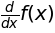

In [119]:
"使用Derivative对象可以表示自定义的数学函数的导函数，例如"
Derivative(f(x), x)

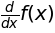

In [120]:
"""由于SymPy不知道如何对自定义的数学函数进行求导，因此它的diff()
方法会返回和上面相同的结果"""
f(x).diff(x) #方法中的x表示对x符号进行求导

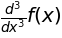

In [121]:
" 添加更多的符号参数可以表示高阶导函数，例如"
Derivative(f(x), x, 3) #表示f(x)对x求三阶导数（或者偏导）

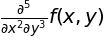

In [122]:
"也可以表示多个变量的导函数，例如"
Derivative(f(x,y), x,2,y,3) #对x求2阶偏导且对y求3阶偏导数（5阶数）

In [123]:
""" diff()求解的格式和Derivative声明的格式类似，例如下面的语句计算
sin(xy)对x两次求导、对y三次求导的结果"""
diff(sin(x*y), x,2,y,3)

In [124]:
"微分方程"
"""dsolve()可以对微分方程进行符号求解。它的第一个参数是一个带未知
函数的表达式，第二个参数是需要进行求解的未知函数。例如下面的程
序对微分方程f'(x) - f(x) = 0进行求解。 得到的结果是一个自然指数函
数，它有一个待定系数c1。"""
f = Function("f")
dsolve(Derivative(f(x), x) - f(x), f(x))

In [128]:
"""用dsolve()解微分方程时可以传递一个hint参数，指定微分方程的解法
。该参数的默认值为“default”,表示由SymPy自动挑选解法。可以将hint参
数设置为“best”，让dsolve()尝试所有己知解法，并返回最简单的解，例
如下面对微分方程 """
Latex(r"\[ \frac{\partial f(x) } {\partial x} + f(x) +f^2(x) = 0 \]")

<IPython.core.display.Latex object>

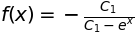

In [130]:
"""进行求解。得到的结果是一个一般方程，它描述了f(x)和自变量之间的关
系。一般把这种函数称为隐函数"""
x = symbols("x", real=True) # 定义符号x 为实数
eq1 = dsolve(f(x).diff(x) + f(x)**2 + f(x), f(x))
eq1

In [131]:
" 如果设置hint参数为“best”,就能得到更简单的显函数表达式"
eq2 = dsolve(f(x).diff(x) + f(x)**2 + f(x), f(x), hint="best")
eq2

In [133]:
"积分"
" integrate()可以计算定积分和不定积分"
Latex(r"\[ \int\,fdx \]")

<IPython.core.display.Latex object>

In [134]:
"integrate(f,(x,a,b)):计算定积分"
Latex(r"\[ \int_a^b\,fdx \]")

<IPython.core.display.Latex object>

In [138]:
"如果要对多个变量计算多重积分，只需要将被积分的变量依次列出即可"
"integrate(f,x,y):计算双重不定积分"
Latex(r"\[ \int \int \, fdx\,dy\]")

<IPython.core.display.Latex object>

In [139]:
"integrate(f,(x,a,b),(y,c,d)):计算二重定积分"
Latex(r"\[ \int_c^d \int_a^b fdx\,dy \]")

<IPython.core.display.Latex object>

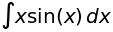

In [140]:
"""和Derivative对象表示微分表达式类似, Integral对象表示积分表达式，
它的参数和integrate() 类似，例如"""
e = Integral(x*sin(x), x)
e

In [141]:
"调用积分对象的doit()方法可以对其进行求值计算"
e.doit()

In [142]:
"""有些积分表达式无法进行符号化简，这时可以调用其evalf()方法或用
求值函数N()对其进行数值运算"""
e2 = Integral(sin(x)/x, (x, 0, 1)) 
e2.doit()

In [143]:
"由于无法进行符号定积分，可用evalf()和N()对其进行数值运算"
e2.evalf()

In [144]:
N(e2)

In [146]:
N(e2, 30) # 可指定精度

In [154]:
" SymPy的数值计算功能还不够强大，不能对应如下这种情况的无限积分"
Latex(r"\[ \int_0^\infty \frac{sin(x)}{x}\,dx = \pi/2 \]")

<IPython.core.display.Latex object>

In [155]:
N(Integral(sin(x)/x, (x, 0, oo))) # oo表示正无穷

In [156]:
"""将积分上限修改为10000也没能计算出近似结果，上限为1000时得到了 
π/2的近似值，不过还远远不够精确"""
N(Integral(sin(x)/x, (x, 0, 10000))) 

In [157]:
N(Integral(sin(x)/x, (x, 0, 1000)))

In [158]:
"""as_sum()方法可以将定积分转换为近似求和公式，它将积分区域
分割成N个小矩形的面积之和"""
e=Integral(sin(x)/x,(x,0,1))
e.as_sum(5)

In [159]:
N(e.as_sum(5))

In [160]:
"用SymPy做计算器"
"""SymPy有三种内建的数值类型：浮点数、有理数和整数。
有理数类用一对整数表示一个有理数：分子和分母，所以
Rational(1,2)代表1/2, Rational(5,2) 代表5/2等等。
有些特殊的常数，像e和pi，它们被视为符号(1+pi将不被数值求解，
它将保持为1+pi)，并且可以有任意精度"""
pi ** 2

In [161]:
pi.evalf()

In [162]:
(pi+exp(1)).evalf(50)

In [164]:
"evalf将表达式求解为浮点数。这还有一个类表示数学上的无限，叫作oo"
oo > 99999

In [165]:
oo + 10000

In [166]:
"极限"
"""极限在sympy中使用很简单，它们的语法是limit(function, variable, 
point)，所以计算当x趋近于0时f(x)的极限，可以给出limit(f, x, 0)"""
from sympy import *
x=Symbol("x")
limit(sin(x)/x, x, 0)

In [167]:
"也可以计算在无穷的极限"
limit(sin(x)/x, x, oo)

In [168]:
"级数展开"
" 使用.series(var, point, order)"
(1/cos(x)).series(x, 0, 10)

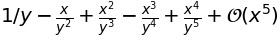

In [169]:
e = 1/(x + y)
s = e.series(x, 0, 5)
s

In [170]:
pprint(s)

          2    3    4        
1   x    x    x    x     ⎛ 5⎞
─ - ── + ── - ── + ── + O⎝x ⎠
y    2    3    4    5        
    y    y    y    y         


In [171]:
"求和"
"计算给定求和变量界限的f的总和(Summation)"
""" summation(f, (i, a, b))变量i从a到b计算f的和.如果不能计算总和，它将
打印相应的求和公式。求值可引入额外的极限计算"""
from sympy import summation, oo, symbols, log
i, n, m = symbols('i n m', integer=True) 
summation(2*i - 1, (i, 1, n))

In [172]:
summation(1/2**i, (i, 0, oo))

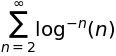

In [173]:
summation(1/log(n)**n, (n, 2, oo))

In [174]:
summation(i, (i, 0, n), (n, 0, m))

In [175]:
summation(i, (i, 0, n))

In [176]:
summation(n**2/2 + n/2, (n, 0, m))

In [177]:
from sympy.abc import x
from sympy import factorial
summation(x**n/factorial(n), (n, 0, oo))

In [178]:
"矩阵"
"矩阵从Matrix类创建,它可以包含符号"
x = Symbol('x')
y = Symbol('y')
A = Matrix([[1,x], [y,1]])
A

⎡1  x⎤
⎢    ⎥
⎣y  1⎦

In [179]:
A ** 2

⎡x⋅y + 1    2⋅x  ⎤
⎢                ⎥
⎣  2⋅y    x⋅y + 1⎦

In [181]:
"模式匹配"
""" 使用.match()方法，和Wild类对表达式实行模式匹配。这个方法将返
回一个发生替换的字典，如下"""
from sympy import Symbol, Wild 
x = Symbol('x') 
p = Wild('p') 
(5*x**2).match(p*x**2)

In [182]:
q = Wild('q') 
(x**2).match(p*x**q)

In [184]:
"如果匹配失败，将返回None"
print((x+1).match(p**x))

None


In [186]:
"可以指定Wild类的排除参数去保证一些东西不出现在结果之中"
p = Wild('p', exclude=[1,x])
print((x+1).match(x+p)) # 1 is excluded

None


In [187]:
print((x+1).match(p+1)) # x is excluded

None


In [188]:
print((x+1).match(x+2+p)) # -1 is not

{p_: -1}


In [1]:
"Numpy.geometry平面几何模块"
"""这个模块可以创建二维几何图形的对象，如直线，线段，圆等，并计
算这些对象的各种信息，例如椭圆的面积，判断一组点是否共线，或者
求两条直线的交点等等"""
"下面有几个简单的例子"
from sympy import *
#创建了3个表示平面上的点的对象
A=Point(0,0)
B=Point(5,0)
C=Point(3,2)
#用上面创建的三个点当三角形的顶点，创建了一个表示三角形的对象t
t=Triangle(A,B,C)
#三角形对象的incenter属性用于获取其内心（内切圆的圆心）
D=t.incenter
D

Point2D(5*(3 + sqrt(13))/(2*sqrt(2) + sqrt(13) + 5), 10/(2*sqrt(2) + sqrt(13) + 5))

In [2]:
"""#利用Circle()创建了经过C，D，B三个点的圆，另外Circle()也可以通过
指定圆心和半径来创建一个圆。还有要注意的是circle()返回的对象是
一个类似元组对象，所以引用这个对象的时候要使用引用元组的方法"""
p=Circle(C,D,B)

In [ ]:
# 利用这种方式作图真是太慢了
"""#首先用Line()创建了一个直线对象，类似的无限的直线对象；
利用圆的intersection()方法，可以计算出圆与直线的两个交点；
最后使用Segment()将传入的这个交点生成一个弦对象（弦对象是
一种有长度的线段）"""
i=Segment(*p.intersection(Line(A,B)))
"""#利用弦对象的length属性获取其长度（表示方法复杂），
然后用evalf()方法计算出"""
i.length.evalf()
j=Segment(*p.intersection(Line(A,C)))
j.length.evalf()
# 利用这种方式作图真是太慢了